In [1]:
#Importing Libraries 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\User\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\Anaconda3\li

## Importing Dataset

In [2]:
df = pd.read_csv('capstone.csv')

In [3]:
df.head()

,Symbol,Date,Time,ShortBuy,ShortBuy Label,ZhanDVAR,ZhanDVAR Label,TwoDvar,TwoDvar Label,100RDVAR,...,high/dvar,high/dvar Label,MACDVdh,MACDVdh Label,high/open,high/open Label,open/q,open/q Label,BuyWINLOSS,BuyWINLOSS Label
0,JBLU,8/21/2007,4:00 PM,0.0,NaN,1.055,NaN,1.52,NaN,1.71,...,1.140826,NaN,1.0,NaN,2.987220,NaN,0.635748,NaN,0.0,NaN
1,JBLU,8/22/2007,4:00 PM,0.0,NaN,1.055,NaN,1.52,NaN,1.71,...,1.140826,NaN,1.0,NaN,2.876923,NaN,0.660122,NaN,0.0,NaN
2,JBLU,8/23/2007,4:00 PM,0.0,NaN,1.055,NaN,1.52,NaN,1.71,...,1.140826,NaN,1.0,NaN,2.906736,NaN,0.653351,NaN,0.0,NaN
3,JBLU,8/24/2007,4:00 PM,0.0,NaN,1.055,NaN,1.52,NaN,1.71,...,1.140826,NaN,1.0,NaN,2.965116,NaN,0.640487,NaN,0.0,NaN
4,JBLU,8/27/2007,4:00 PM,0.0,NaN,1.055,NaN,1.52,NaN,1.71,...,1.140826,NaN,1.0,NaN,2.968254,NaN,0.639810,NaN,0.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716701 entries, 0 to 716700
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Symbol             716701 non-null  object 
 1   Date               716701 non-null  object 
 2   Time               716701 non-null  object 
 3   ShortBuy           716629 non-null  float64
 4   ShortBuy Label     0 non-null       float64
 5   ZhanDVAR           680559 non-null  float64
 6   ZhanDVAR Label     0 non-null       float64
 7   TwoDvar            680073 non-null  float64
 8   TwoDvar Label      0 non-null       float64
 9   100RDVAR           677502 non-null  float64
 10  100RDVAR Label     0 non-null       float64
 11  MA5Anewhigh        716639 non-null  float64
 12  MA5Anewhigh Label  0 non-null       float64
 13  high/dvar          674059 non-null  float64
 14  high/dvar Label    0 non-null       float64
 15  MACDVdh            575582 non-null  float64
 16  MA

In [6]:
df.describe()

,ShortBuy,ShortBuy Label,ZhanDVAR,ZhanDVAR Label,TwoDvar,TwoDvar Label,100RDVAR,100RDVAR Label,MA5Anewhigh,MA5Anewhigh Label,high/dvar,high/dvar Label,MACDVdh,MACDVdh Label,high/open,high/open Label,open/q,open/q Label,BuyWINLOSS,BuyWINLOSS Label
count,716629.000000,0.0,680559.000000,0.0,680073.00,0.0,677502.000000,0.0,716639.000000,0.0,674059.000000,0.0,575582.00,0.0,574390.000000,0.0,670809.000000,0.0,714280.000000,0.0
mean,0.000460,NaN,1.088047,NaN,inf,NaN,3.528723,NaN,1.147524,NaN,1.806758,NaN,NaN,NaN,2.615768,NaN,1.242789,NaN,0.000280,NaN
std,0.021454,NaN,0.103610,NaN,NaN,NaN,3.565248,NaN,0.160618,NaN,11.479511,NaN,NaN,NaN,28.243195,NaN,6.127405,NaN,0.016731,NaN
min,0.000000,NaN,0.911482,NaN,0.00,NaN,0.000000,NaN,0.200000,NaN,0.099808,NaN,-inf,NaN,0.032787,NaN,0.000000,NaN,0.000000,NaN
25%,0.000000,NaN,1.045695,NaN,1.71,NaN,2.010000,NaN,1.090000,NaN,1.000000,NaN,-1.43,NaN,0.734591,NaN,0.777065,NaN,0.000000,NaN
50%,0.000000,NaN,1.062682,NaN,2.04,NaN,2.640000,NaN,1.120000,NaN,1.131579,NaN,1.13,NaN,1.046169,NaN,1.001502,NaN,0.000000,NaN
75%,0.000000,NaN,1.094858,NaN,2.96,NaN,3.820000,NaN,1.180000,NaN,1.305466,NaN,2.63,NaN,1.596696,NaN,1.209910,NaN,0.000000,NaN
max,1.000000,NaN,3.098039,NaN,inf,NaN,79.080000,NaN,53.060000,NaN,463.833300,NaN,inf,NaN,2655.173000,NaN,290.769200,NaN,1.000000,NaN


## Wrangling Data

In [8]:
# Dropping all the 'Label' columns because they only contain nan values and isn't useful.
df_copy = df[df.columns.drop(list(df.filter(regex='Label')))]
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716701 entries, 0 to 716700
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Symbol       716701 non-null  object 
 1   Date         716701 non-null  object 
 2   Time         716701 non-null  object 
 3   ShortBuy     716629 non-null  float64
 4   ZhanDVAR     680559 non-null  float64
 5   TwoDvar      680073 non-null  float64
 6   100RDVAR     677502 non-null  float64
 7   MA5Anewhigh  716639 non-null  float64
 8   high/dvar    674059 non-null  float64
 9   MACDVdh      575582 non-null  float64
 10  high/open    574390 non-null  float64
 11  open/q       670809 non-null  float64
 12  BuyWINLOSS   714280 non-null  float64
dtypes: float64(10), object(3)
memory usage: 71.1+ MB


In [9]:
df_clean = df_copy.drop(columns = ['Time'])

In [10]:
# only interested in rows where Shortbuy happnened. Hence dropping all rows where shortbuy=0
df_clean1 = df_clean[df_clean.ShortBuy != 0]
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 248 to 714837
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Symbol       402 non-null    object 
 1   Date         402 non-null    object 
 2   ShortBuy     330 non-null    float64
 3   ZhanDVAR     330 non-null    float64
 4   TwoDvar      330 non-null    float64
 5   100RDVAR     329 non-null    float64
 6   MA5Anewhigh  340 non-null    float64
 7   high/dvar    325 non-null    float64
 8   MACDVdh      327 non-null    float64
 9   high/open    328 non-null    float64
 10  open/q       329 non-null    float64
 11  BuyWINLOSS   396 non-null    float64
dtypes: float64(10), object(2)
memory usage: 40.8+ KB


In [11]:
df_clean2 = df_clean1.replace([np.inf, -np.inf], np.nan)
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 248 to 714837
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Symbol       402 non-null    object 
 1   Date         402 non-null    object 
 2   ShortBuy     330 non-null    float64
 3   ZhanDVAR     330 non-null    float64
 4   TwoDvar      330 non-null    float64
 5   100RDVAR     329 non-null    float64
 6   MA5Anewhigh  340 non-null    float64
 7   high/dvar    325 non-null    float64
 8   MACDVdh      321 non-null    float64
 9   high/open    328 non-null    float64
 10  open/q       329 non-null    float64
 11  BuyWINLOSS   396 non-null    float64
dtypes: float64(10), object(2)
memory usage: 40.8+ KB


In [12]:
df_clean2.ShortBuy.isnull().sum()

72

In [13]:
# Dropping rows where ShortBuy and BuyWINLOSS are nans, ShortBuy is the data interested in, BuyWINLOSS is the y dependent variable.
df_clean3 = df_clean2.dropna(how = 'any', subset = ['ShortBuy'])
df_clean4 = df_clean3.dropna(how = 'any', subset = ['BuyWINLOSS'])
df_clean4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 248 to 714837
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Symbol       324 non-null    object 
 1   Date         324 non-null    object 
 2   ShortBuy     324 non-null    float64
 3   ZhanDVAR     324 non-null    float64
 4   TwoDvar      324 non-null    float64
 5   100RDVAR     323 non-null    float64
 6   MA5Anewhigh  324 non-null    float64
 7   high/dvar    322 non-null    float64
 8   MACDVdh      315 non-null    float64
 9   high/open    322 non-null    float64
 10  open/q       323 non-null    float64
 11  BuyWINLOSS   324 non-null    float64
dtypes: float64(10), object(2)
memory usage: 32.9+ KB


In [14]:
#Shorbuy not needed for model training and calculations
df_clean5 = df_clean4.drop(columns = ['ShortBuy'])


In [15]:
# filling the rest of the missing values with mean
floatcol = list(df_clean5)
floatcol = floatcol[2:]
fill_mean = lambda col: col.fillna(col.mean()) if col.name in floatcol else col
df_final = df_clean5.apply(fill_mean , axis=0)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 248 to 714837
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Symbol       324 non-null    object 
 1   Date         324 non-null    object 
 2   ZhanDVAR     324 non-null    float64
 3   TwoDvar      324 non-null    float64
 4   100RDVAR     324 non-null    float64
 5   MA5Anewhigh  324 non-null    float64
 6   high/dvar    324 non-null    float64
 7   MACDVdh      324 non-null    float64
 8   high/open    324 non-null    float64
 9   open/q       324 non-null    float64
 10  BuyWINLOSS   324 non-null    float64
dtypes: float64(9), object(2)
memory usage: 30.4+ KB


In [16]:
#prepping data for modelling
X = df_final.iloc[:, 2:-1].values
y = df_final.iloc[:, -1].values

## Feature Scaling

In [17]:
sc = StandardScaler()
X = sc.fit_transform(X)

## Splitting the dataset into the Training set and Test set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##  Building and Training Artificial Neural Network

In [19]:
ann = tf.keras.models.Sequential()

In [20]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [22]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [23]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
ann.fit(X_train, y_train, batch_size = 5, epochs = 100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
259/259 [==============================] - 0s 524us/sample - loss: 0.6833 - acc: 0.5830
Epoch 2/100
259/259 [==============================] - 0s 148us/sample - loss: 0.6741 - acc: 0.6139
Epoch 3/100
259/259 [==============================] - 0s 144us/sample - loss: 0.6695 - acc: 0.6293
Epoch 4/100
259/259 [==============================] - 0s 156us/sample - loss: 0.6648 - acc: 0.6255
Epoch 5/100
259/259 [==============================] - 0s 143us/sample - loss: 0.6619 - acc: 0.6371
Epoch 6/100
259/259 [==============================] - 0s 146us/sample - loss: 0.6595 - acc: 0.6332
Epoch 7/100
259/259 [==============================] - 0s 152us/sample - loss: 0.6573 - acc: 0.6371
Epoch 8/100
259/259 [==============================] - 0s 145us/sample - loss: 0.6559 - acc: 0.6409
Epoch 9/100
259/259 [==============================] - 0s 150us/sample - loss: 0.6543 - acc: 0.6409
Epoch 

Epoch 79/100
259/259 [==============================] - 0s 187us/sample - loss: 0.5903 - acc: 0.7027
Epoch 80/100
259/259 [==============================] - 0s 148us/sample - loss: 0.5889 - acc: 0.7104
Epoch 81/100
259/259 [==============================] - 0s 139us/sample - loss: 0.5886 - acc: 0.7027
Epoch 82/100
259/259 [==============================] - 0s 141us/sample - loss: 0.5874 - acc: 0.7027
Epoch 83/100
259/259 [==============================] - 0s 135us/sample - loss: 0.5868 - acc: 0.7066
Epoch 84/100
259/259 [==============================] - 0s 146us/sample - loss: 0.5856 - acc: 0.7027
Epoch 85/100
259/259 [==============================] - 0s 166us/sample - loss: 0.5843 - acc: 0.7066
Epoch 86/100
259/259 [==============================] - 0s 156us/sample - loss: 0.5859 - acc: 0.7027
Epoch 87/100
259/259 [==============================] - 0s 162us/sample - loss: 0.5823 - acc: 0.7066
Epoch 88/100
259/259 [==============================] - 0s 139us/sample - loss: 0.5823 - ac

## Evaluating ANN Model

In [27]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 8 21]
 [ 8 28]]


## Training the Random Forest Classification model on the Training set

In [29]:
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Evaluating Random Forest Classifier

In [30]:
y_pred1 = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
print(cm)

[[ 9 20]
 [ 5 31]]


In [32]:
accuracy = cross_val_score(estimator = classifier, X= X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracy.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy.std()*100))

Accuracy: 59.11 %
Standard Deviation: 6.75 %


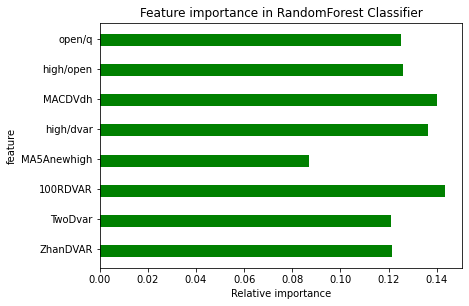

<Figure size 360x360 with 0 Axes>

In [34]:
# Feature importance in RandomForest Classifier
col = ['ZhanDVAR', 'TwoDvar', '100RDVAR', 'MA5Anewhigh', 'high/dvar', 
       'MACDVdh', 'high/open', 'open/q']
#modelname.feature_importance_
imp = classifier.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(imp)) # the x locations for the groups
ax.barh(ind, imp, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)